In [ ]:
# 1. Read the shapefile using GeoPandas (County Geometry)
# 2. Selecting rows (records) based on a condition
# 3. Load Excel File with Pandas (GDP data)
# 4. Join (Merge) county geometry and GDP data
# 5. Make a choropleth map of GDP data 
# 6. Correlation Analysis between Population and GDP

In [1]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

/var/folders/pz/gjtw38596y3_mm15469h9jy40000gn/T/ipykernel_92561/3771535966.py:1: DeprecationWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas still uses PyGEOS by default. However, starting with version 0.14, the default will switch to Shapely. To force to use Shapely 2.0 now, you can either uninstall PyGEOS or set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In the next release, GeoPandas will switch to using Shapely by default, even if PyGEOS is installed. If you only have PyGEOS installed to get speed-ups, this switch should be smooth. However, if you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopanda

In [ ]:
# Load County Shapefile
county_gdf = gpd.read_file('./data/county_cleaned.shp')

# Load GDP Data
gdp_df = pd.read_excel('./data/GDP_data_cleaned.xlsx', dtype={'GEOID': str})

# Merge (Join) GDP Data with County Shapefile
gdp_gdf = county_gdf.merge(gdp_df, on='GEOID', how='left')

# Visualize GDP Data
# Create an empty figure and axis (canvas)
fig, ax = plt.subplots(1, 1, figsize=(10,10))  

gdp_gdf.plot(column='GDP',            # Column to visualize
             cmap='Blues',            # Color map
             scheme='NaturalBreaks',  # Classification scheme
             legend=True,             # Show legend
             legend_kwds={'loc': 'lower left', 'fontsize': 8.1}, # Legend settings
             k=7,                     # Number of classes
             ax=ax                    # Axis to plot on
             )

# Load state shapefile (Plotting purposes)
state_gdf = gpd.read_file('./data/states.shp') 

# Add state boundaries
state_gdf.boundary.plot(ax=ax, color='grey', linewidth=0.5) 

# Set title
ax.set_title('County-level Gross Domestic Product (GDP)', fontsize=16) 

# Remove axis
ax.axis('off') 

plt.show() # Show the plot


In [2]:
# .read_file() method is used to read various spatial data formats (shapefile, GeoJSON, etc.)
county_gdf = gpd.read_file('./data/county_cleaned.shp')
county_gdf

,GEOID,NAME,STATE,geometry
0,01001,"Autauga County, Alabama",01,"POLYGON ((-86.45876 32.40573, -86.46056 32.404..."
1,01003,"Baldwin County, Alabama",01,"POLYGON ((-87.93604 30.26147, -87.91825 30.253..."
2,01005,"Barbour County, Alabama",01,"POLYGON ((-85.74174 31.61940, -85.73981 31.621..."
3,01007,"Bibb County, Alabama",01,"POLYGON ((-86.87630 33.00306, -86.87644 33.000..."
4,01009,"Blount County, Alabama",01,"POLYGON ((-86.57753 33.80198, -86.57780 33.765..."
...,...,...,...,...
3103,56037,"Sweetwater County, Wyoming",56,"POLYGON ((-110.04890 41.46490, -110.04800 41.5..."
3104,56039,"Teton County, Wyoming",56,"POLYGON ((-111.04558 43.61783, -111.04563 43.6..."
3105,56041,"Uinta County, Wyoming",56,"POLYGON ((-110.58367 41.57916, -110.57956 41.5..."
3106,56043,"Washakie County, Wyoming",56,"POLYGON ((-108.55056 44.16846, -108.50652 44.1..."


In [3]:
county_gdf.dtypes

GEOID         object
NAME          object
STATE         object
geometry    geometry
dtype: object

<Axes: >

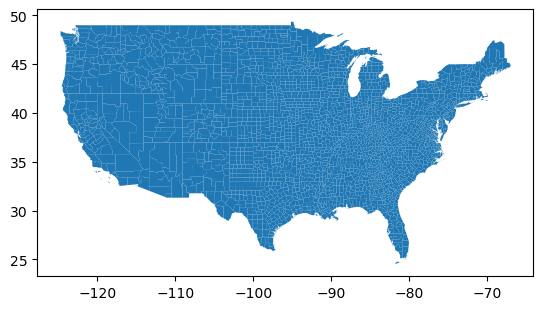

In [4]:
# You can use .plot() method to plot the GeoDataFrame. If there is no 'geometry' column, it will plot a numerical values.
county_gdf.plot()

In [52]:
# To read a Excel file, you can use `pandas` package and .read_excel() method.
# You can also use .read_csv() method to read a CSV file.
# the output of .read_excel() and .read_csv() method is a DataFrame
gdp_df = pd.read_excel('data/GDP_data_cleaned.xlsx')
gdp_df

,GeoFips,GeoName,LineCode,Description,GDP
0,1001,"Autauga, AL",1,Real GDP (thousands of chained 2017 dollars),1722438
1,1001,"Autauga, AL",2,Chain-type quantity indexes for real GDP,97.724
2,1001,"Autauga, AL",3,Current-dollar GDP (thousands of current dollars),1813553
3,1003,"Baldwin, AL",1,Real GDP (thousands of chained 2017 dollars),8102009
4,1003,"Baldwin, AL",2,Chain-type quantity indexes for real GDP,109.745
...,...,...,...,...,...
9349,56043,"Washakie, WY",2,Chain-type quantity indexes for real GDP,100.577
9350,56043,"Washakie, WY",3,Current-dollar GDP (thousands of current dollars),365071
9351,56045,"Weston, WY",1,Real GDP (thousands of chained 2017 dollars),286131
9352,56045,"Weston, WY",2,Chain-type quantity indexes for real GDP,100.336


In [6]:
# Using .dtypes attribute, you can check the data type of each column.
gdp_df.dtypes

GeoFips         int64
GeoName        object
LineCode        int64
Description    object
GDP            object
dtype: object

In [54]:
# Since the 'GeoFips' column is a numerical value, we need to convert it to a string.
# You can use .astype() method to convert the data type of a column.
gdp_df['GeoFips'] = gdp_df['GeoFips'].astype(str)
gdp_df.dtypes

GeoFips        object
GeoName        object
LineCode        int64
Description    object
GDP            object
dtype: object

In [55]:
# .iterrows() method is used to iterate over the rows of a DataFrame. It returns an iterator containing index of each row and the data in each row as a Series.
for idx, row in gdp_df.iterrows():
    
    # Check the length of the GeoFips column (i.e., len(row['GeoFips']))
    if len(row['GeoFips']) == 4: # if the length of the GeoFips column is 4, it means that there is a missing leading zero.
        gdp_df.at[idx, 'GEOID'] = '0' + row['GeoFips'] # add a leading zero to the GeoFips column
    elif len(row['GeoFips']) == 5: # if the length of the GeoFips column is 5, it means that there is no missing leading zero.
        gdp_df.at[idx, 'GEOID'] = row['GeoFips']
    else:  # You can also check if there are any unexpected length of GeoFips column.
        print('Unexpected Length of GeoFips')

gdp_df

,GeoFips,GeoName,LineCode,Description,GDP,GEOID
0,1001,"Autauga, AL",1,Real GDP (thousands of chained 2017 dollars),1722438,01001
1,1001,"Autauga, AL",2,Chain-type quantity indexes for real GDP,97.724,01001
2,1001,"Autauga, AL",3,Current-dollar GDP (thousands of current dollars),1813553,01001
3,1003,"Baldwin, AL",1,Real GDP (thousands of chained 2017 dollars),8102009,01003
4,1003,"Baldwin, AL",2,Chain-type quantity indexes for real GDP,109.745,01003
...,...,...,...,...,...,...
9349,56043,"Washakie, WY",2,Chain-type quantity indexes for real GDP,100.577,56043
9350,56043,"Washakie, WY",3,Current-dollar GDP (thousands of current dollars),365071,56043
9351,56045,"Weston, WY",1,Real GDP (thousands of chained 2017 dollars),286131,56045
9352,56045,"Weston, WY",2,Chain-type quantity indexes for real GDP,100.336,56045


In [56]:
gdp_df = gdp_df.loc[gdp_df['LineCode'] == 1, ['GEOID', 'GeoName', 'GDP']]
gdp_df

,GEOID,GeoName,GDP
0,01001,"Autauga, AL",1722438
3,01003,"Baldwin, AL",8102009
6,01005,"Barbour, AL",731636
9,01007,"Bibb, AL",460018
12,01009,"Blount, AL",907179
...,...,...,...
9339,56037,"Sweetwater, WY",3405807
9342,56039,"Teton, WY",2659859
9345,56041,"Uinta, WY",783682
9348,56043,"Washakie, WY",344531


In [57]:
gdp_df['STATE'] = gdp_df['GEOID'].str[:2]
gdp_df

,GEOID,GeoName,GDP,STATE
0,01001,"Autauga, AL",1722438,01
3,01003,"Baldwin, AL",8102009,01
6,01005,"Barbour, AL",731636,01
9,01007,"Bibb, AL",460018,01
12,01009,"Blount, AL",907179,01
...,...,...,...,...
9339,56037,"Sweetwater, WY",3405807,56
9342,56039,"Teton, WY",2659859,56
9345,56041,"Uinta, WY",783682,56
9348,56043,"Washakie, WY",344531,56


In [58]:
# GEOID for Conterminous US States (Lower 48 States)
lower_48_states = ['01', '04', '05', '06', '08', '09', '10', '11', '12', '13', '16', '17', '18', '19', '20',
                   '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', 
                   '36', '37', '38', '39', '40', '41', '42', '44', '45', '46', '47', '48', '49', '50', '51', 
                   '53', '54', '55', '56']

In [60]:
gdp_df = gdp_df.loc[gdp_df['STATE'].isin(lower_48_states)].reset_index(drop=True)
gdp_df

,GEOID,GeoName,GDP,STATE
0,01001,"Autauga, AL",1722438,01
1,01003,"Baldwin, AL",8102009,01
2,01005,"Barbour, AL",731636,01
3,01007,"Bibb, AL",460018,01
4,01009,"Blount, AL",907179,01
...,...,...,...,...
3075,56037,"Sweetwater, WY",3405807,56
3076,56039,"Teton, WY",2659859,56
3077,56041,"Uinta, WY",783682,56
3078,56043,"Washakie, WY",344531,56


In [63]:
gdp_df[['GEOID', 'GeoName', 'GDP']].to_excel('./data/GDP_data_cleaned.xlsx', index=False)

In [61]:
gdp_df.loc[gdp_df['GDP'].isna()]

,GEOID,GeoName,GDP,STATE


In [9]:
gdp_df['LineCode'] == 1

0        True
1       False
2       False
3        True
4       False
        ...  
9349    False
9350    False
9351     True
9352    False
9353    False
Name: LineCode, Length: 9354, dtype: bool

In [10]:
gdp_df = gdp_df.loc[gdp_df['LineCode'] == 1, ['GEOID', 'GeoName', 'GDP']]
gdp_df

,GEOID,GeoName,GDP
0,01001,"Autauga, AL",1722438
3,01003,"Baldwin, AL",8102009
6,01005,"Barbour, AL",731636
9,01007,"Bibb, AL",460018
12,01009,"Blount, AL",907179
...,...,...,...
9339,56037,"Sweetwater, WY",3405807
9342,56039,"Teton, WY",2659859
9345,56041,"Uinta, WY",783682
9348,56043,"Washakie, WY",344531


In [11]:
gdp_gdf = county_gdf.merge(gdp_df, on='GEOID', how='left')
gdp_gdf

,GEOID,NAME,STATE,geometry,GeoName,GDP
0,01001,"Autauga County, Alabama",01,"POLYGON ((-86.45876 32.40573, -86.46056 32.404...","Autauga, AL",1722438
1,01003,"Baldwin County, Alabama",01,"POLYGON ((-87.93604 30.26147, -87.91825 30.253...","Baldwin, AL",8102009
2,01005,"Barbour County, Alabama",01,"POLYGON ((-85.74174 31.61940, -85.73981 31.621...","Barbour, AL",731636
3,01007,"Bibb County, Alabama",01,"POLYGON ((-86.87630 33.00306, -86.87644 33.000...","Bibb, AL",460018
4,01009,"Blount County, Alabama",01,"POLYGON ((-86.57753 33.80198, -86.57780 33.765...","Blount, AL",907179
...,...,...,...,...,...,...
3103,56037,"Sweetwater County, Wyoming",56,"POLYGON ((-110.04890 41.46490, -110.04800 41.5...","Sweetwater, WY",3405807
3104,56039,"Teton County, Wyoming",56,"POLYGON ((-111.04558 43.61783, -111.04563 43.6...","Teton, WY",2659859
3105,56041,"Uinta County, Wyoming",56,"POLYGON ((-110.58367 41.57916, -110.57956 41.5...","Uinta, WY",783682
3106,56043,"Washakie County, Wyoming",56,"POLYGON ((-108.55056 44.16846, -108.50652 44.1...","Washakie, WY",344531


In [12]:
# Since we did the left-join, there are some missing values in the GDP column.
# The following code is to select the rows that have missing values (NULL/NaN value ) in the GDP column.

gdp_gdf.loc[gdp_gdf['GDP'].isna()]

,GEOID,NAME,STATE,geometry,GeoName,GDP
2787,51003,"Albemarle County, Virginia",51,"POLYGON ((-78.42050 37.87707, -78.46776 37.823...",NaN,NaN
2788,51005,"Alleghany County, Virginia",51,"POLYGON ((-79.85473 37.88781, -79.80806 37.880...",NaN,NaN
2793,51015,"Augusta County, Virginia",51,"POLYGON ((-79.06381 37.91714, -79.06691 37.914...",NaN,NaN
2801,51031,"Campbell County, Virginia",51,"POLYGON ((-79.26079 37.13022, -79.26442 37.126...",NaN,NaN
2803,51035,"Carroll County, Virginia",51,"POLYGON ((-80.62115 36.61572, -80.61934 36.613...",NaN,NaN
2812,51053,"Dinwiddie County, Virginia",51,"POLYGON ((-77.39688 37.05792, -77.39612 37.050...",NaN,NaN
2814,51059,"Fairfax County, Virginia",51,"MULTIPOLYGON (((-77.36709 38.71408, -77.36786 ...",NaN,NaN
2819,51069,"Frederick County, Virginia",51,"POLYGON ((-78.33522 39.06134, -78.34099 39.063...",NaN,NaN
2825,51081,"Greensville County, Virginia",51,"POLYGON ((-77.74420 36.57991, -77.72176 36.613...",NaN,NaN
2829,51089,"Henry County, Virginia",51,"POLYGON ((-79.92008 36.54245, -79.93327 36.542...",NaN,NaN


In [13]:
# We can simply replace the NaN values with 0, using .fillna() method.
gdp_gdf['GDP'] = gdp_gdf['GDP'].fillna(0)

<Axes: >

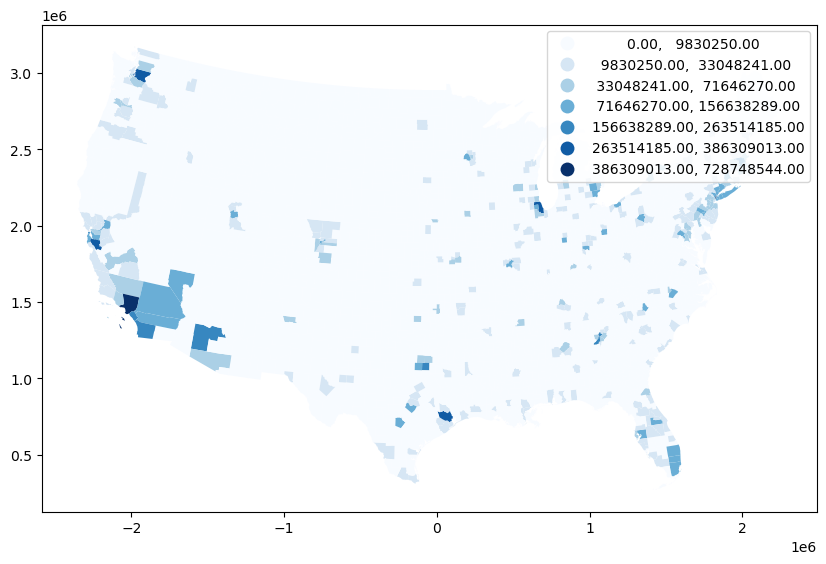

In [14]:
gdp_gdf = gdp_gdf.to_crs(epsg=5070)
gdp_gdf.plot(column='GDP', cmap='Blues', scheme='NaturalBreaks', figsize=(10,10), legend=True, k=7)

In [18]:
pop_df.loc[1, 'GEO_ID'][9:]

'01003'

In [64]:
# Read the population data from the American Community Survey (ACS)
pop_df = pd.read_csv('./data/ACSDP5Y2020.DP05-Data.csv')
pop_df

pop_df['GEOID'] = pop_df['GEO_ID'].apply(lambda x: x[9:])
pop_df = pop_df[['GEOID', 'NAME', 'DP05_0001E']]
pop_df = pop_df.rename(columns={'DP05_0001E': 'Pop'})
pop_df

,GEOID,NAME,Pop
0,01001,"Autauga County, Alabama",55639
1,01003,"Baldwin County, Alabama",218289
2,01005,"Barbour County, Alabama",25026
3,01007,"Bibb County, Alabama",22374
4,01009,"Blount County, Alabama",57755
...,...,...,...
3216,72145,"Vega Baja Municipio, Puerto Rico",51089
3217,72147,"Vieques Municipio, Puerto Rico",8508
3218,72149,"Villalba Municipio, Puerto Rico",21899
3219,72151,"Yabucoa Municipio, Puerto Rico",32867


In [65]:
pop_df.to_excel('./data/population_data_cleaned.xlsx', index=False)

In [24]:
pop_gdf = county_gdf.merge(pop_df, on='GEOID', how='left')
pop_gdf

,GEOID,NAME_x,STATE,geometry,NAME_y,Pop
0,01001,"Autauga County, Alabama",01,"POLYGON ((-86.45876 32.40573, -86.46056 32.404...","Autauga County, Alabama",55639
1,01003,"Baldwin County, Alabama",01,"POLYGON ((-87.93604 30.26147, -87.91825 30.253...","Baldwin County, Alabama",218289
2,01005,"Barbour County, Alabama",01,"POLYGON ((-85.74174 31.61940, -85.73981 31.621...","Barbour County, Alabama",25026
3,01007,"Bibb County, Alabama",01,"POLYGON ((-86.87630 33.00306, -86.87644 33.000...","Bibb County, Alabama",22374
4,01009,"Blount County, Alabama",01,"POLYGON ((-86.57753 33.80198, -86.57780 33.765...","Blount County, Alabama",57755
...,...,...,...,...,...,...
3103,56037,"Sweetwater County, Wyoming",56,"POLYGON ((-110.04890 41.46490, -110.04800 41.5...","Sweetwater County, Wyoming",43352
3104,56039,"Teton County, Wyoming",56,"POLYGON ((-111.04558 43.61783, -111.04563 43.6...","Teton County, Wyoming",23356
3105,56041,"Uinta County, Wyoming",56,"POLYGON ((-110.58367 41.57916, -110.57956 41.5...","Uinta County, Wyoming",20374
3106,56043,"Washakie County, Wyoming",56,"POLYGON ((-108.55056 44.16846, -108.50652 44.1...","Washakie County, Wyoming",7933


In [26]:
import scipy

In [34]:
corr_df = pd.DataFrame()
corr_df = pd.concat([corr_df, gdp_gdf[['GEOID', 'GDP']]], axis=1)
corr_df = corr_df.merge(pop_gdf[['GEOID', 'Pop']], on='GEOID', how='left')
corr_df

,GEOID,GDP,Pop
0,01001,1722438,55639
1,01003,8102009,218289
2,01005,731636,25026
3,01007,460018,22374
4,01009,907179,57755
...,...,...,...
3103,56037,3405807,43352
3104,56039,2659859,23356
3105,56041,783682,20374
3106,56043,344531,7933


In [47]:
gdp_df.loc[~gdp_df['GEOID'].isin(corr_df['GEOID'])]

,GEOID,GeoName,GDP
67,02013,"Aleutians East Borough, AK",252358
68,02016,"Aleutians West Census Area, AK",670490
69,02020,"Anchorage Municipality, AK",22410855
70,02050,"Bethel Census Area, AK",686331
71,02060,"Bristol Bay Borough, AK",126140
...,...,...,...
2924,51949,"Southampton + Franklin, VA*",743804
2925,51951,"Spotsylvania + Fredericksburg, VA*",6383365
2926,51953,"Washington + Bristol, VA*",3452419
2927,51955,"Wise + Norton, VA*",1422293


In [48]:
county_gdf

,GEOID,NAME,STATE,geometry
0,01001,"Autauga County, Alabama",01,"POLYGON ((-86.45876 32.40573, -86.46056 32.404..."
1,01003,"Baldwin County, Alabama",01,"POLYGON ((-87.93604 30.26147, -87.91825 30.253..."
2,01005,"Barbour County, Alabama",01,"POLYGON ((-85.74174 31.61940, -85.73981 31.621..."
3,01007,"Bibb County, Alabama",01,"POLYGON ((-86.87630 33.00306, -86.87644 33.000..."
4,01009,"Blount County, Alabama",01,"POLYGON ((-86.57753 33.80198, -86.57780 33.765..."
...,...,...,...,...
3103,56037,"Sweetwater County, Wyoming",56,"POLYGON ((-110.04890 41.46490, -110.04800 41.5..."
3104,56039,"Teton County, Wyoming",56,"POLYGON ((-111.04558 43.61783, -111.04563 43.6..."
3105,56041,"Uinta County, Wyoming",56,"POLYGON ((-110.58367 41.57916, -110.57956 41.5..."
3106,56043,"Washakie County, Wyoming",56,"POLYGON ((-108.55056 44.16846, -108.50652 44.1..."


In [40]:
corr_df.sort_values('GDP', ascending=False)

,GEOID,GDP,Pop
175,06037,728748544,10040682
1824,36061,722111514,1629153
576,17031,386309013,5169517
2589,48201,375075182,4680609
199,06085,339750453,1924379
...,...,...,...
2883,51530,0,6477
2884,51540,0,47217
2886,51570,0,17283
2887,51580,0,5653


In [43]:
gdp_df = gdp_df.reset_index(drop=True)
gdp_df

,GEOID,GeoName,GDP
0,01001,"Autauga, AL",1722438
1,01003,"Baldwin, AL",8102009
2,01005,"Barbour, AL",731636
3,01007,"Bibb, AL",460018
4,01009,"Blount, AL",907179
...,...,...,...
3113,56037,"Sweetwater, WY",3405807
3114,56039,"Teton, WY",2659859
3115,56041,"Uinta, WY",783682
3116,56043,"Washakie, WY",344531


In [44]:
gdp_df.to_excel('data/GDP_data_cleaned_1.xlsx', index=False)

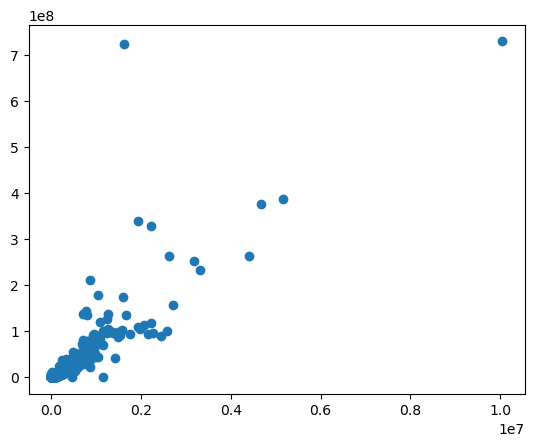

In [36]:
plt.scatter(corr_df['Pop'], corr_df['GDP'])

In [35]:
import scipy.stats

scipy.stats.pearsonr(corr_df['GDP'], corr_df['Pop'])

PearsonRResult(statistic=0.8737289210828921, pvalue=0.0)

In [31]:
gdp_gdf[['GEOID', 'GDP']]

,GEOID,GDP
0,01001,1722438
1,01003,8102009
2,01005,731636
3,01007,460018
4,01009,907179
...,...,...
3103,56037,3405807
3104,56039,2659859
3105,56041,783682
3106,56043,344531


In [32]:
pop_gdf[['GEOID', 'Pop']]

,GEOID,Pop
0,01001,55639
1,01003,218289
2,01005,25026
3,01007,22374
4,01009,57755
...,...,...
3103,56037,43352
3104,56039,23356
3105,56041,20374
3106,56043,7933


In [27]:
scipy.stats.pearsonr(pop_gdf['GDP'], pop_gdf['Pop'])

KeyError: 'GDP'